In [1]:
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

In [2]:
# Retrieve the data
Belem = pd.read_csv(Path() / "data" / "obs-pr" / "belem.csv")
Helsinki = pd.read_csv(Path() / "data" / "obs-pr" / "helsinki.csv")
ERA5 = xr.open_dataset(Path() / "data" / "era5-pr" / "data.nc")

In [3]:
# Prepare data for plotting
ERA5_Belem = ERA5.sel(latitude=-1.4563, longitude=360 - 48.5013, method="nearest")
ERA5_Helsinki = ERA5.sel(latitude=60.1699, longitude=24.9384, method="nearest")

Time = ERA5["valid_time"].data
ERA5_Belem_PR = ERA5_Belem["tp"].data * 1000
ERA5_Helsinki_PR = ERA5_Helsinki["tp"].data * 1000
Belem_PR = Belem["PR"]
Helsinki_PR = Helsinki["PR"]

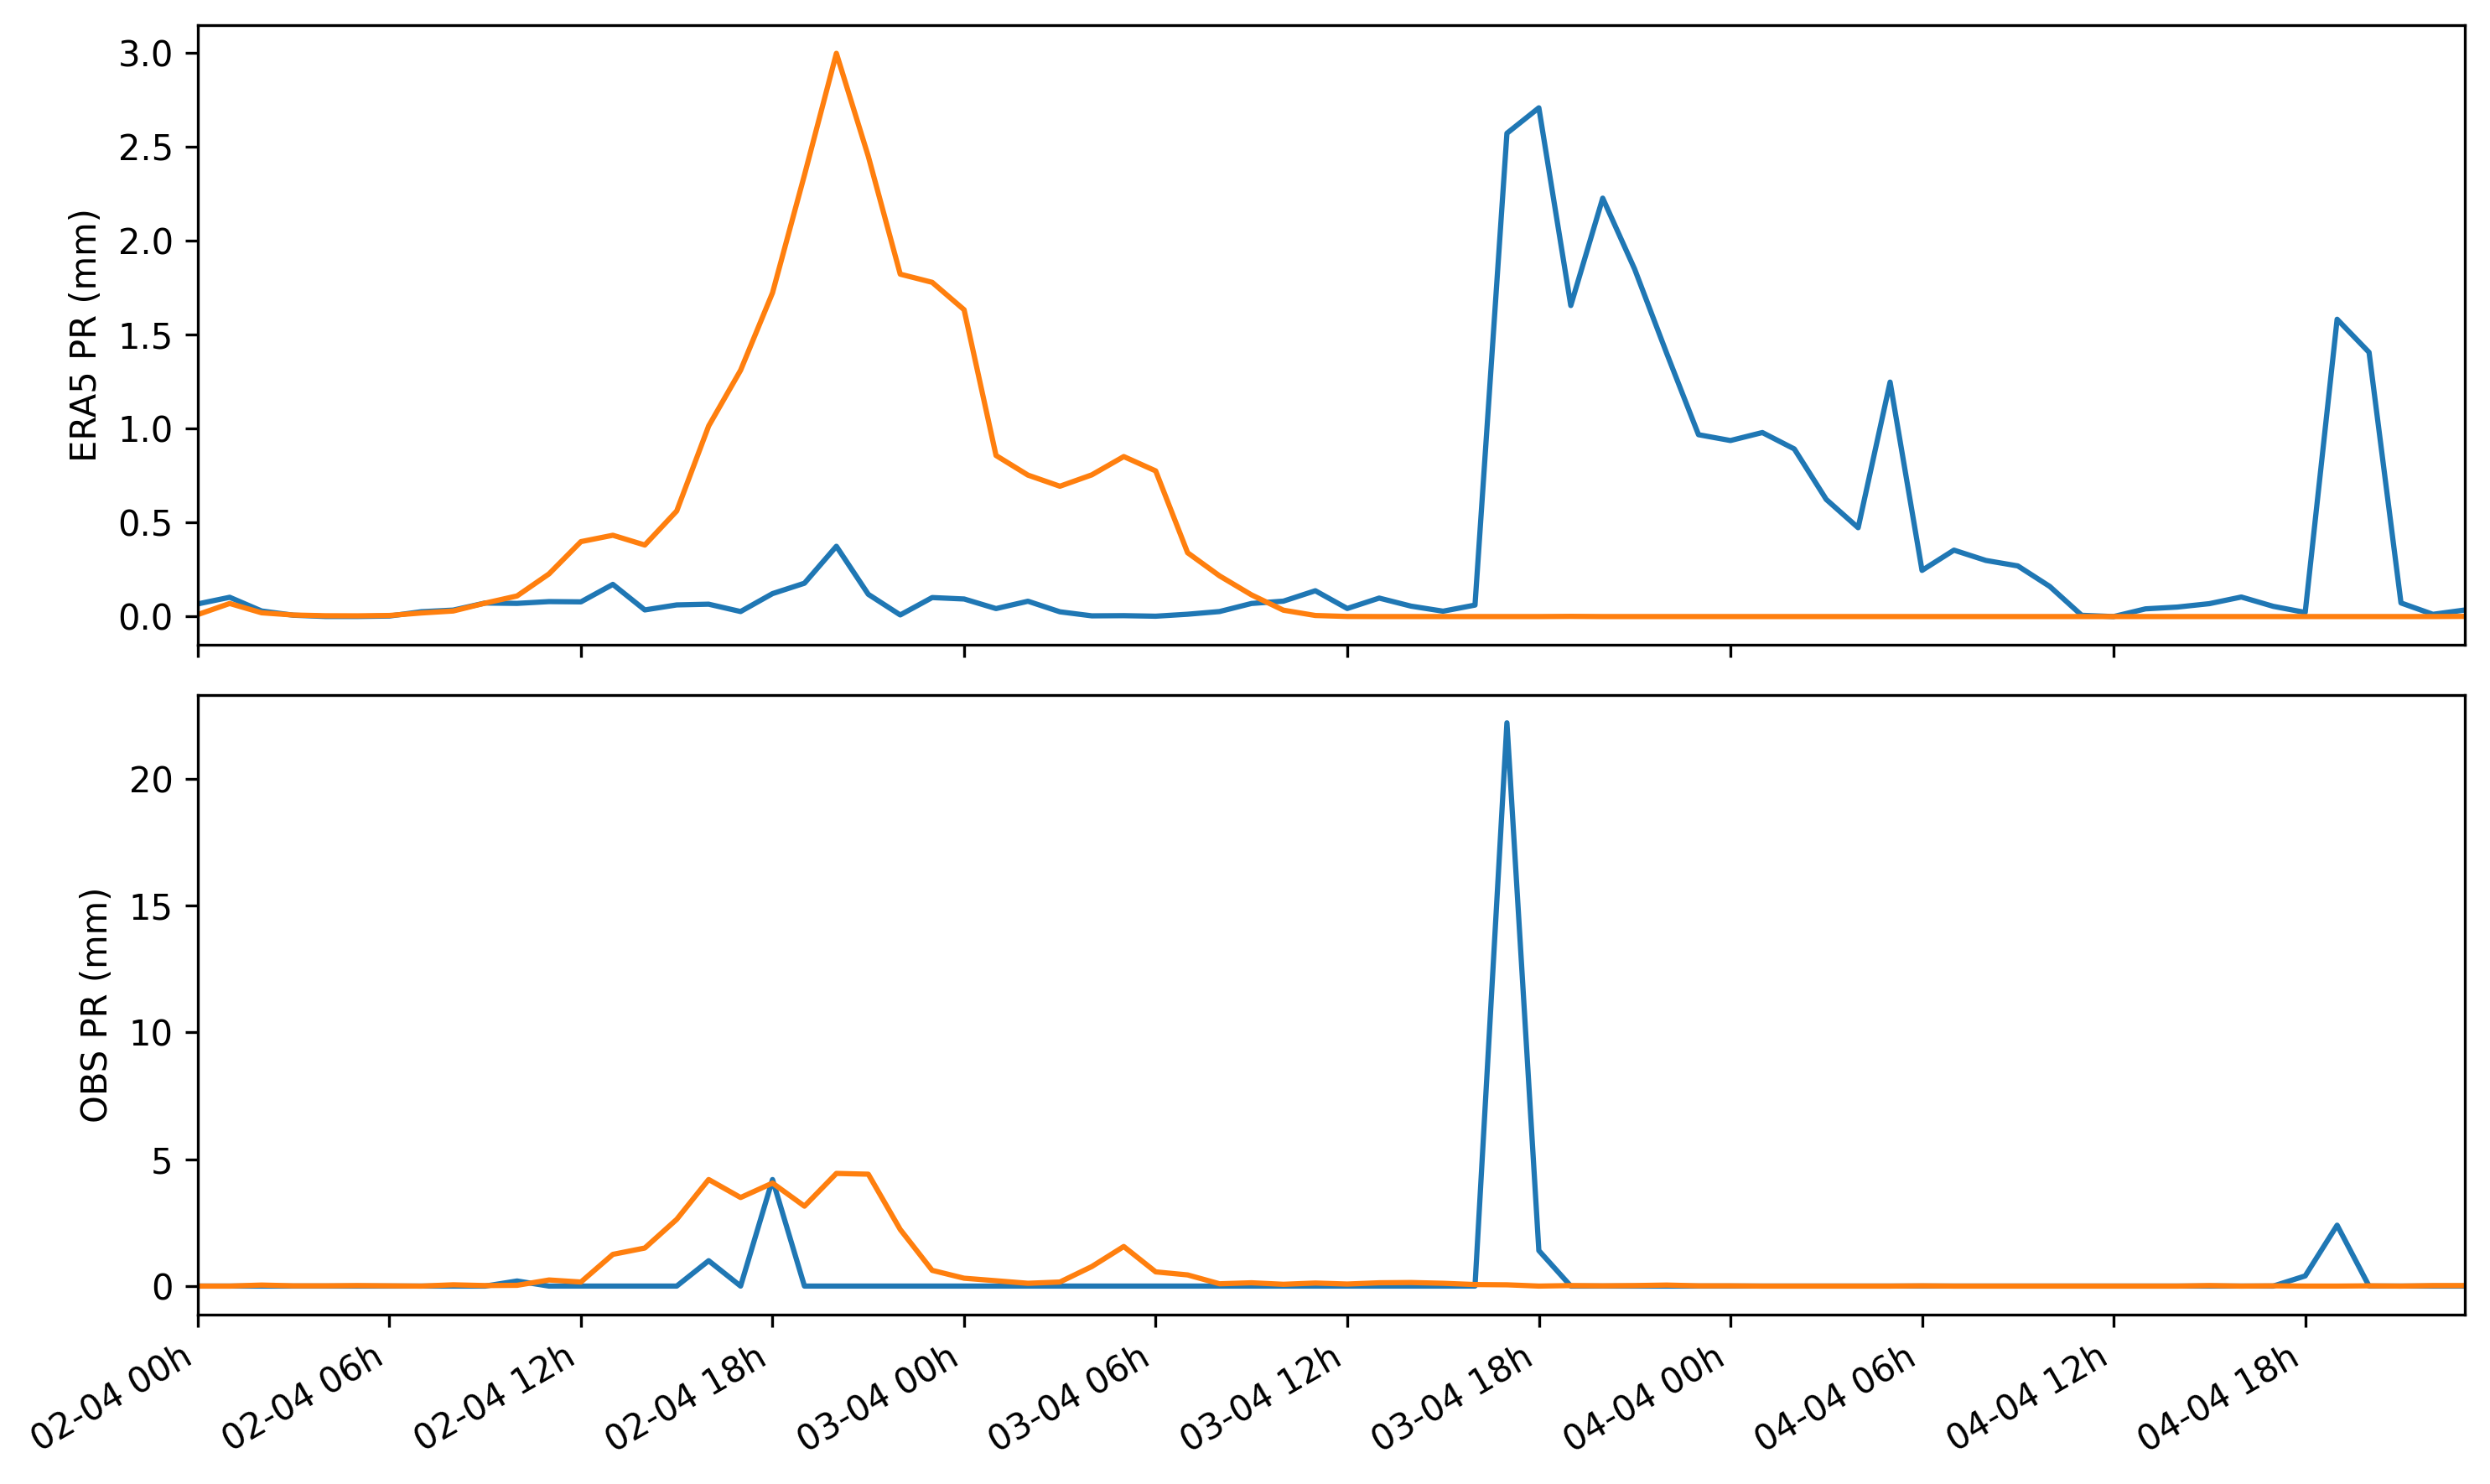

In [4]:
# Plotting
fig = plt.figure(
    figsize=(10, 6),
    dpi=300,
)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

pos = mdates.HourLocator(byhour=(0, 6, 12, 18))
fmt = mdates.DateFormatter("%d-%m %Hh")

ax1.plot(Time, ERA5_Belem_PR)
ax1.plot(Time, ERA5_Helsinki_PR)

ax1.set_ylabel("ERA5 PR (mm)")
ax1.xaxis.set_ticklabels([])
ax1.set_xlim(Time.min(), Time.max())


ax2.plot(Time, Belem_PR)
ax2.plot(Time, Helsinki_PR)

ax2.set_ylabel("OBS PR (mm)")
ax2.xaxis.set(major_locator=pos, major_formatter=fmt)
ax2.set_xlim(Time.min(), Time.max())

plt.xticks(rotation=30, ha="right")
plt.tight_layout()

plt.show()